In [1]:
import pandas as pd
ch_charts = pd.read_csv('https://raw.githubusercontent.com/jeremiasbaur/CoronaHackZurich2020/master/Spotify/Latest_CH.csv')
del ch_charts['Unnamed: 0']
len(ch_charts['Track_ID'].unique())

1800

In [19]:
import numpy as np

In [2]:
ch_charts.head()

,Rank,Title_Artist,Streams,Track_URL,Track_ID,Track title,Artist,country_code,date
0,1,Mood (feat. Iann Dior) by 24kGoldn,61704,https://open.spotify.com/track/3tjFYV6RSFtuktY...,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. Iann Dior),24kGoldn,CH,2020-09-17
1,2,"Lemonade (feat. Gunna, Don Toliver & NAV) by ...",46779,https://open.spotify.com/track/2DQNYMRjisN3KAP...,2DQNYMRjisN3KAPj1bEwOI,"Lemonade (feat. Gunna, Don Toliver & NAV)",Internet Money,CH,2020-09-17
2,3,Savage Love (Laxed - Siren Beat) by Jawsh 685,34060,https://open.spotify.com/track/1xQ6trAsedVPCdb...,1xQ6trAsedVPCdbtDAmk0c,Savage Love (Laxed - Siren Beat),Jawsh 685,CH,2020-09-17
3,4,For The Night (feat. Lil Baby & DaBaby) by Po...,30475,https://open.spotify.com/track/0PvFJmanyNQMseI...,0PvFJmanyNQMseIFrU708S,For The Night (feat. Lil Baby & DaBaby),Pop Smoke,CH,2020-09-17
4,5,ROCKSTAR (feat. Roddy Ricch) by DaBaby,29353,https://open.spotify.com/track/7ytR5pFWmSjzHJI...,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),DaBaby,CH,2020-09-17


In [3]:
unique_tracks = ch_charts.groupby('Track_ID').sum()
unique_tracks.reset_index(inplace = True, drop = False)

In [4]:
len(unique_tracks)

1800

In [5]:
unique_tracks.sort_values('Streams', ascending=False).head()

,Track_ID,Rank,Streams
436,1rgnBhdG2JDFTbYkYRZAku,2381,8632992
491,24Yi9hE78yPEbZ4kxyoXAI,1907,6982573
128,0VjIjW4GlUZAMYd2vXMi3b,871,6605437
1797,7ytR5pFWmSjzHJIeQkgog4,550,6519939
190,0nbXyq5TXYPCO7pr3N8S4I,9975,5813758


In [6]:
sub_df = ch_charts[ch_charts['Track_ID'] == '1rgnBhdG2JDFTbYkYRZAku']

date = list(sub_df['date'].values)
streams = list(sub_df['Streams'].values)

top_df = pd.DataFrame({'Date' : date, 'Streams' : streams})
top_df['Date'] = pd.to_datetime(top_df['Date'])
top_df.set_index('Date', inplace=True)

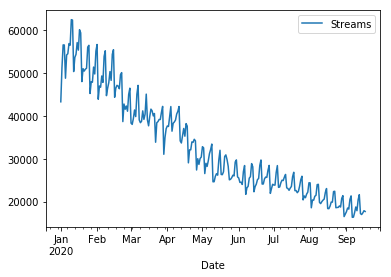

In [7]:
% matplotlib inline
top_df.plot()

In [8]:
import spotipy
import spotipy.oauth2 as oauth2

CLIENT_ID = "797b13be9767402ea60f551c48b26098"
CLIENT_SECRET = "58df6de4c0fb4ad194f2d7decf33447d"

credentials = oauth2.SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)

spotify = spotipy.Spotify(client_credentials_manager=credentials)

In [9]:
spotify.audio_features('1rgnBhdG2JDFTbYkYRZAku')

[{'danceability': 0.825,
  'energy': 0.593,
  'key': 6,
  'loudness': -6.401,
  'mode': 0,
  'speechiness': 0.0988,
  'acousticness': 0.688,
  'instrumentalness': 0.000161,
  'liveness': 0.17,
  'valence': 0.54,
  'tempo': 98.078,
  'type': 'audio_features',
  'id': '1rgnBhdG2JDFTbYkYRZAku',
  'uri': 'spotify:track:1rgnBhdG2JDFTbYkYRZAku',
  'track_href': 'https://api.spotify.com/v1/tracks/1rgnBhdG2JDFTbYkYRZAku',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1rgnBhdG2JDFTbYkYRZAku',
  'duration_ms': 209755,
  'time_signature': 4}]

In [10]:
from IPython.display import Audio
Audio(url=spotify.track('1rgnBhdG2JDFTbYkYRZAku')['preview_url'] + '.mp3')

In [11]:
# Split the Track_IDs into batches of size 100

part_list = []

for bunch in range(0, len(ch_charts['Track_ID'].unique()), 100):
    
    part = ch_charts['Track_ID'].unique()[bunch:bunch+100]
    
    part_list.append(part)

In [12]:
import time

df_list = []

for idx, bunch in enumerate(part_list):
    
    print("Scraping bunch " + str(idx) + ', remaining: ' + str(len(part_list)-idx))
    
    sub = spotify.audio_features(bunch)
    sub_df = pd.DataFrame(sub)
    df_list.append(sub_df)
      
    time.sleep(0.5)

Scraping bunch 0, remaining: 18
Scraping bunch 1, remaining: 17
Scraping bunch 2, remaining: 16
Scraping bunch 3, remaining: 15
Scraping bunch 4, remaining: 14
Scraping bunch 5, remaining: 13
Scraping bunch 6, remaining: 12
Scraping bunch 7, remaining: 11
Scraping bunch 8, remaining: 10
Scraping bunch 9, remaining: 9
Scraping bunch 10, remaining: 8
Scraping bunch 11, remaining: 7
Scraping bunch 12, remaining: 6
Scraping bunch 13, remaining: 5
Scraping bunch 14, remaining: 4
Scraping bunch 15, remaining: 3
Scraping bunch 16, remaining: 2
Scraping bunch 17, remaining: 1


In [13]:
audio_features_df = pd.concat(df_list)
audio_features_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.221,https://api.spotify.com/v1/audio-analysis/3tjF...,0.700,140526,0.722,3tjFYV6RSFtuktYl3ZtYcq,0.0,7,0.272,-3.558,0,0.0369,90.989,4,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,audio_features,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
1,0.250,https://api.spotify.com/v1/audio-analysis/2DQN...,0.800,195429,0.658,2DQNYMRjisN3KAPj1bEwOI,0.0,1,0.111,-6.142,0,0.0790,140.042,4,https://api.spotify.com/v1/tracks/2DQNYMRjisN3...,audio_features,spotify:track:2DQNYMRjisN3KAPj1bEwOI,0.462
2,0.234,https://api.spotify.com/v1/audio-analysis/1xQ6...,0.767,171375,0.481,1xQ6trAsedVPCdbtDAmk0c,0.0,0,0.269,-8.520,0,0.0803,150.076,4,https://api.spotify.com/v1/tracks/1xQ6trAsedVP...,audio_features,spotify:track:1xQ6trAsedVPCdbtDAmk0c,0.761
3,0.114,https://api.spotify.com/v1/audio-analysis/0PvF...,0.823,190476,0.586,0PvFJmanyNQMseIFrU708S,0.0,6,0.193,-6.606,0,0.2000,125.971,4,https://api.spotify.com/v1/tracks/0PvFJmanyNQM...,audio_features,spotify:track:0PvFJmanyNQMseIFrU708S,0.347
4,0.247,https://api.spotify.com/v1/audio-analysis/7ytR...,0.746,181733,0.690,7ytR5pFWmSjzHJIeQkgog4,0.0,11,0.101,-7.956,1,0.1640,89.977,4,https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...,audio_features,spotify:track:7ytR5pFWmSjzHJIeQkgog4,0.497


In [14]:
final_df = unique_tracks.merge(audio_features_df, how = 'left', left_on='Track_ID', right_on = 'id')

In [92]:
final_df.to_csv("Audio_features_charts.csv")

In [16]:
ch_charts

,Rank,Title_Artist,Streams,Track_URL,Track_ID,Track title,Artist,country_code,date
0,1,Mood (feat. Iann Dior) by 24kGoldn,61704,https://open.spotify.com/track/3tjFYV6RSFtuktY...,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. Iann Dior),24kGoldn,CH,2020-09-17
1,2,"Lemonade (feat. Gunna, Don Toliver & NAV) by ...",46779,https://open.spotify.com/track/2DQNYMRjisN3KAP...,2DQNYMRjisN3KAPj1bEwOI,"Lemonade (feat. Gunna, Don Toliver & NAV)",Internet Money,CH,2020-09-17
2,3,Savage Love (Laxed - Siren Beat) by Jawsh 685,34060,https://open.spotify.com/track/1xQ6trAsedVPCdb...,1xQ6trAsedVPCdbtDAmk0c,Savage Love (Laxed - Siren Beat),Jawsh 685,CH,2020-09-17
3,4,For The Night (feat. Lil Baby & DaBaby) by Po...,30475,https://open.spotify.com/track/0PvFJmanyNQMseI...,0PvFJmanyNQMseIFrU708S,For The Night (feat. Lil Baby & DaBaby),Pop Smoke,CH,2020-09-17
4,5,ROCKSTAR (feat. Roddy Ricch) by DaBaby,29353,https://open.spotify.com/track/7ytR5pFWmSjzHJI...,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),DaBaby,CH,2020-09-17
5,6,WAP (feat. Megan Thee Stallion) by Cardi B,29224,https://open.spotify.com/track/4Oun2ylbjFKMPTi...,4Oun2ylbjFKMPTiaSbbCih,WAP (feat. Megan Thee Stallion),Cardi B,CH,2020-09-17
6,7,Bande organisée by Jul,28368,https://open.spotify.com/track/205HNJ73cgpC0LA...,205HNJ73cgpC0LAOnuQiWT,Bande organisée,Jul,CH,2020-09-17
7,8,Head & Heart (feat. MNEK) by Joel Corry,28048,https://open.spotify.com/track/6cx06DFPPHchuUA...,6cx06DFPPHchuUAcTxznu9,Head & Heart (feat. MNEK),Joel Corry,CH,2020-09-17
8,9,Watermelon Sugar by Harry Styles,27484,https://open.spotify.com/track/6UelLqGlWMcVH1E...,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,Harry Styles,CH,2020-09-17
9,10,Fuckst mich nur ab by Bonez MC,27096,https://open.spotify.com/track/0y8mJFmm4ogCHnf...,0y8mJFmm4ogCHnfe0oTuT6,Fuckst mich nur ab,Bonez MC,CH,2020-09-17


In [17]:
time_features = ch_charts.merge(final_df, how = 'left', left_on='Track_ID', right_on = 'Track_ID')

In [89]:
time_features.to_csv("Base Spotify data.csv")

In [20]:
empty_list = []

for date in time_features['date'].unique():
    
    empty_dict = {}
    
    date_df = time_features[time_features['date'] == date]
    weights = date_df['Streams_x'] / sum(date_df['Streams_x'])
    weighted_average_valence = np.dot(date_df['valence'], weights)
    
    empty_dict['date'] = date
    empty_dict['average_valence'] = weighted_average_valence
    
    empty_list.append(empty_dict)

In [21]:
valence_df = pd.DataFrame(empty_list)
valence_df.index = pd.to_datetime(valence_df['date'])

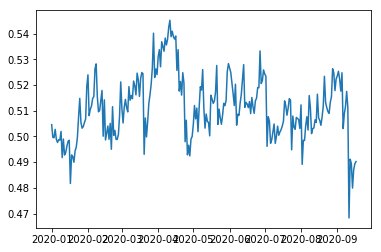

In [22]:
import matplotlib.pyplot as plt
plt.plot(valence_df.index, valence_df['average_valence'])

In [317]:
valence_df.to_csv('weighted_average_valence.csv')

In [23]:
swiss_cases = pd.read_csv('data-ThyG3.csv')
swiss_cases.index = pd.to_datetime(swiss_cases['date'])
del swiss_cases['date']

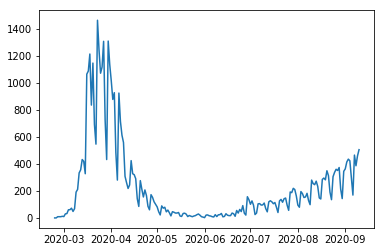

In [24]:
plt.plot(swiss_cases.index, swiss_cases['new.infections'])

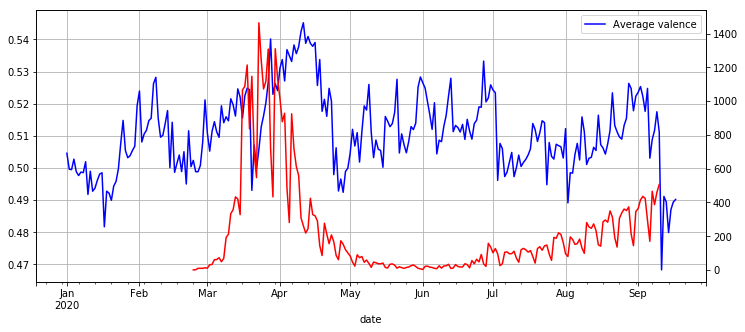

In [25]:
plt.figure(figsize=(12,5))

ax1 = valence_df.average_valence.plot(color='blue', grid=True, label='Average valence')
ax2 = swiss_cases['new.infections'].plot(color='red', grid=True, secondary_y=True, label='One-year Interpolated')

#h1, l1 = ax1.get_legend_handles_labels()
#h2, l2 = ax2.get_legend_handles_labels()

ax1.legend(loc=1)
#ax2.legend(loc=2)


#plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [26]:
valence_df['2020-02-24':];

In [27]:
swiss_cases.iloc[::-1].head()

,new.infections
date,
2020-09-10,506
2020-09-09,460
2020-09-08,387
2020-09-07,466
2020-09-06,170


In [28]:
len(valence_df['2020-09-10':'2020-02-24']['average_valence'])

200

In [29]:
np.corrcoef(swiss_cases.iloc[::-1]['new.infections'], valence_df['2020-09-10':'2020-02-24']['average_valence'])

array([[1.        , 0.30906919],
       [0.30906919, 1.        ]])

In [30]:
api_key = '35d1d908b96d4f3dc113e038eca30b53'
api_method_name  = "track.search"
api_url          = "http://api.musixmatch.com/ws/1.1/" + api_method_name + "?apikey=" + api_key

In [32]:
artist_name = time_features.iloc[0]['Title_Artist']

In [33]:
artist_name = 'Ed Sheeran'

In [ ]:
artist_name = time_features.iloc[0]['Title_Artist'].split('by ')[1]
track_name = 'Mood (feat. Iann Dior)'

In [308]:
artist_name

'24kGoldn'

In [35]:
import requests

payload = {'format'      : 'json',
           'page'        : 1,
           'page_size'   : 100,
           'q_artist'    : artist_name,
          'q_track'      : track_name,}

res = requests.get(api_url, params=payload)

In [36]:
from bs4 import BeautifulSoup

In [37]:
soup = BeautifulSoup(res.text, "html5lib")

In [38]:
soup

<html><head></head><body>{"message":{"header":{"status_code":200,"execute_time":0.13742208480835,"available":2},"body":{"track_list":[{"track":{"track_id":200360817,"track_name":"Mood (feat. iann dior)","track_name_translation_list":[],"track_rating":100,"commontrack_id":113838056,"instrumental":0,"explicit":1,"has_lyrics":1,"has_subtitles":1,"has_richsync":1,"num_favourite":89,"album_id":39278869,"album_name":"Mood (feat. iann dior) - Single","artist_id":46038964,"artist_name":"24kGoldn feat. iann dior","track_share_url":"https:\/\/www.musixmatch.com\/lyrics\/24kGoldn-iann-dior\/Mood-Iann-Dior?utm_source=application&amp;utm_campaign=api&amp;utm_medium=Humboldt-Universit%C3%A4t+zu+Berlin%3A1409620662430","track_edit_url":"https:\/\/www.musixmatch.com\/lyrics\/24kGoldn-iann-dior\/Mood-Iann-Dior\/edit?utm_source=application&amp;utm_campaign=api&amp;utm_medium=Humboldt-Universit%C3%A4t+zu+Berlin%3A1409620662430","restricted":0,"updated_time":"2020-09-15T18:19:20Z","primary_genres":{"music

In [39]:
payload = {'format'      : 'json',
           'track_id'    : '200360817',}

api_method_name  = "track.lyrics.get"
api_url = "http://api.musixmatch.com/ws/1.1/" + api_method_name + "?apikey=" + api_key

res = requests.get(api_url, params=payload)

In [40]:
soup = BeautifulSoup(res.text, "html5lib")

In [41]:
soup

<html><head></head><body>{"message":{"header":{"status_code":200,"execute_time":0.010372161865234},"body":{"lyrics":{"lyrics_id":23821284,"explicit":1,"lyrics_body":"Ah-ah-ah\nYeah, yeah, yeah, yeah\nYeah\n\nWhy you always in a mood?\nFuckin' 'round, actin' brand new\nI ain't tryna tell you what to do\nBut try to play it cool\nBaby, I ain't playing by your rules\nEverything look better with a view\n\nWhy you always in a mood?\nFuckin' 'round, actin' brand new\nI ain't tryna tell you what to do\nBut try to play it cool\nBaby, I ain't playing by your rules\nEverything look better with a view, yeah\n\nI could never get attached\nWhen I start to feel, I unattach\nSomehow always end up feeling bad\nBaby, I am not your dad, it's not all you want from me\nI just want your company\n\nGirl, it's obvious, elephant in the room\n...\n\n******* This Lyrics is NOT for Commercial use *******\n(1409620662430)","script_tracking_url":"https:\/\/tracking.musixmatch.com\/t1.0\/m_js\/e_1\/sn_0\/l_23821284\

In [46]:
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [306]:
len(time_features['Track_ID'].unique())

1800

In [44]:
song = json.loads(soup.find_all("body")[0].text)['message']['body']['lyrics']['lyrics_body'].replace("\n", ".")

In [47]:
sentiment_score_sentence = []

for sentence in song.split(".")[:-1]:
    if sentence != "":
        print(sentence)
        sentiment_score = analyser.polarity_scores(sentence)
        print(sentiment_score['compound'])
        if sentiment_score['compound'] >= 0.05:
            print("Positive!")
        elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
            print("Neutral!")
        elif sentiment_score['compound'] <= 0.05:
            print("Negative!")
            
        sentiment_score_sentence.append(sentiment_score['compound'])

Ah-ah-ah
0.0
Neutral!
Yeah, yeah, yeah, yeah
0.7783
Positive!
Yeah
0.296
Positive!
Why you always in a mood?
0.0
Neutral!
Fuckin' 'round, actin' brand new
0.0
Neutral!
I ain't tryna tell you what to do
0.0
Neutral!
But try to play it cool
0.7227
Positive!
Baby, I ain't playing by your rules
-0.1511
Negative!
Everything look better with a view
0.4404
Positive!
Why you always in a mood?
0.0
Neutral!
Fuckin' 'round, actin' brand new
0.0
Neutral!
I ain't tryna tell you what to do
0.0
Neutral!
But try to play it cool
0.7227
Positive!
Baby, I ain't playing by your rules
-0.1511
Negative!
Everything look better with a view, yeah
0.6249
Positive!
I could never get attached
0.0
Neutral!
When I start to feel, I unattach
0.0
Neutral!
Somehow always end up feeling bad
-0.4588
Negative!
Baby, I am not your dad, it's not all you want from me
-0.0572
Negative!
I just want your company
0.0772
Positive!
Girl, it's obvious, elephant in the room
0.0
Neutral!
******* This Lyrics is NOT for Commercial use 

In [48]:
np.array(sentiment_score_sentence).mean()

0.12927272727272726

In [49]:
sentiment_score = analyser.polarity_scores(song)

In [50]:
sentiment_score

{'neg': 0.035, 'neu': 0.82, 'pos': 0.145, 'compound': 0.9145}

In [51]:
tears_heaven = "Would you know my name? If I saw you in heaven Would it be the same? If I saw you in heaven" + " I must be strong And carry on 'Cause I know I don't belong Here in heaven" + " Would you hold my hand? If I saw you in heaven Would you help me stand? If I saw you in heaven"+ " I'll find my way Through night and day 'Cause I know I just can't stay Here in heaven"+  " Time can bring you down Time can bend your knees Time can break your heart Have you begging please"+ " Begging please Beyond the door There's peace, I'm sure And I know there'll be no more Tears in heaven" + " Would you know my name? If I saw you in heaven Would you be the same? If I saw you in heaven" + " I must be strong And carry on 'Cause I know I don't belong Here in heaven"

In [52]:
sentiment_score = analyser.polarity_scores(tears_heaven)

In [53]:
sentiment_score

{'neg': 0.011, 'neu': 0.67, 'pos': 0.319, 'compound': 0.9958}

In [54]:
happy = "I'm very happy I love everyone and I'm the luckiest person in the world."
analyser.polarity_scores(happy)

{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.924}

In [55]:
sad = "I'm depressed and I tried to kill myself because I hate everyone."
analyser.polarity_scores(sad)

{'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.9136}

In [56]:
sad_song = "You and I, we're like fireworks and symphonies exploding in the sky With you, I'm alive Like all the missing pieces of my heart, they finally collide So stop time right here in the moonlight 'Cause I don't ever wanna close my eyes Without you, I feel broke Like I'm half of a whole Without you, I've got no hand to hold Without you, I feel torn Like a sail in a storm Without you, I'm just a sad song I'm just a sad song With you, I fall It's like I'm leaving all my past and silhouettes up on the wall With you, I'm a beautiful mess It's like we're standing hand and hand with all our fears up on the edge So stop time right here in the moonlight 'Cause I don't ever wanna close my eyes Without you, I feel broke Like I'm half of a whole Without you, I've got no hand..."
analyser.polarity_scores(sad_song)

{'neg': 0.169, 'neu': 0.658, 'pos': 0.174, 'compound': 0.4609}

In [234]:
with open('Twitter_API.txt', 'r') as f:
    keys = f.read().split()

In [ ]:
import twitter

In [235]:
api = twitter.Api(consumer_key=keys[0],
                 consumer_secret = keys[1],
                 access_token_key = keys[2],
                 access_token_secret = keys[3])

In [ ]:
statuses = api.GetUserTimeline('108566175', count=200)

In [258]:
api.GetSearch('hackzurich', geocode= [47.3686498 , 8.5391825 , "200km"])

[Status(ID=1307077223023861762, ScreenName=hackzurich, Created=Fri Sep 18 22:01:08 +0000 2020, Text='A hybrid teamselfie! Pascal with dark themed workstation, Elias as smart fox and Markus as the physical attendee.… https://t.co/BLnQAwCuvG'),
 Status(ID=1307057949534285825, ScreenName=hackzurich, Created=Fri Sep 18 20:44:33 +0000 2020, Text='Hacking starts at 11 pm (CET). If you need a donught 🍩🍩🍩 you know where to go 👇🏽. https://t.co/dRUlsbws5S'),
 Status(ID=1307045266529411072, ScreenName=RogerHilfiker, Created=Fri Sep 18 19:54:09 +0000 2020, Text='@cybermax @TanyaOnAir @hackzurich Tell us more about it, please')]

In [ ]:
first_tweet = result[0].AsDict()

In [61]:
import tweepy

auth = tweepy.OAuthHandler('B5Su4alcCwLloS9wRqDeR4hsR', 'e4tVP3LwAvc0BTbxyZGEH4ORefZ44GdtXqZ4bzvteSqI3HraM1')
auth.set_access_token('2609885322-fk9REkBvsWmUSPPW3YUoab66Uj8jzjwQouXIgJG', 'u7n2JGFYgUttWKIvC6wAinVn3TVshoSY5fY5H8cnCPRgG')
api = tweepy.API(auth, wait_on_rate_limit=True)
searchTerms = ""
noOfSearch = 200
searchCountry = "Switzerland"
places = api.geo_search(query=searchCountry, granularity="country")
place_id = places[0].id
tweets = tweepy.Cursor(api.search , q='{} place:{}'.format(searchTerms, place_id) and ("place:%s" % place_id), lang="en", tweet_mode = 'extended', count = 100).items(noOfSearch)

In [134]:
tweet_list = []

for tweet in tweets:
    
    tweet_list.append(tweet)
    
D = [i._json for i in tweet_list]

with open('First_bunch.json', 'w', encoding='utf-8') as f:
    json.dump(D, f, ensure_ascii=False)
    
tweet_ids_list = []

for tweet in tweet_list:
    
    tweet_ids_list.append(tweet._json['id'])
    
max_id = tweet_ids_list[-1] 

tweets_second_bunch = tweepy.Cursor(api.search , q='{} place:{}'.format(searchTerms, place_id) and ("place:%s" % place_id), lang="en", tweet_mode = 'extended', count = 100, max_id = str(max_id-1)).items(noOfSearch)

In [143]:
tweet_ids_list[-1]

1307200474215591936

In [145]:
max_id = tweet_ids_list[-1] # this is the oldest tweet found

In [146]:
max_id

1307200474215591936

In [147]:
tweets_second_bunch = tweepy.Cursor(api.search , q='{} place:{}'.format(searchTerms, place_id) and ("place:%s" % place_id), lang="en", tweet_mode = 'extended', count = 100, max_id = str(max_id-1)).items(noOfSearch)

In [315]:
max_id = None
for j in range(50):
    header = {
        "q": f'{searchTerms} place:{place_id}'.format(searchTerms, place_id) and ("place:%s" % place_id),
        "lang": "de",
        "tweet_mode": "extended",
        "count": 100,
        "max_id": max_id,
        "search_term": ""
    }
    
    try:
    
        batch_tweets = tweepy.Cursor(api.search, **header).items(noOfSearch)
        
    except Exception as error:
        
        break
        
    batch_tweets = [i._json for i in batch_tweets]
    batch_ids = [i["id"] for i in batch_tweets]
    with open(f'{j}_de_bunch.json', 'w', encoding='utf-8') as f:
        json.dump(batch_tweets, f, ensure_ascii=False)
    # lol()
    max_id = batch_ids[-1]
    
#tweepy.Cursor(api.search , q='{} place:{}'.format(searchTerms, place_id) and ("place:%s" % place_id),
#              lang="en", tweet_mode = 'extended', count = 100).items(noOfSearch)

In [254]:
bunches = []

for bunch in range(50):
    
    with open('./Twitter Bunches/' + str(bunch) + '_bunch.json', 'r', encoding='utf-8') as f:
    
        D_read = json.load(f)
        bunches.extend(D_read) # extend instead of append

In [262]:
tweet_ids = []

for tweet in bunches:
    
    tweet_ids.append(tweet['id'])

In [273]:
len(np.unique(np.array(tweet_ids)))

7098

In [274]:
len(bunches)

7147

In [312]:
bunches[0]

{'created_at': 'Sat Sep 19 11:30:41 +0000 2020',
 'id': 1307280951433736199,
 'id_str': '1307280951433736199',
 'full_text': '@WYIAnX4oUlPPqr5 Yes we did an MRI but no thrombosis visible- I found it with us in the follow up ...👍😬',
 'truncated': False,
 'display_text_range': [17, 103],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'WYIAnX4oUlPPqr5',
    'name': 'Abdulwahed AL zaher',
    'id': 906546254771097600,
    'id_str': '906546254771097600',
    'indices': [0, 16]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': 1307266582201208833,
 'in_reply_to_status_id_str': '1307266582201208833',
 'in_reply_to_user_id': 906546254771097600,
 'in_reply_to_user_id_str': '906546254771097600',
 'in_reply_to_screen_name': 'WYIAnX4oUlPPqr5',
 'user': {'id': 592716699,
  'id_str': '592716699',
  'name': 'D

In [289]:
unique_stuff = { tweet['id'] : tweet for tweet in bunches }

In [290]:
unique_stuff.keys()

dict_keys([1307280951433736199, 1307280295800995841, 1307280055240974340, 1307279392570257410, 1307279247124443137, 1307279004362252296, 1307278520289316864, 1307277795861684224, 1307277626004783104, 1307277162882400257, 1307276676821327873, 1307276465160019970, 1307276369907384320, 1307276116533612544, 1307276028939821061, 1307275753806065665, 1307274925842063360, 1307274350626844673, 1307274170523418625, 1307273877526065155, 1307273696562868225, 1307272818309189632, 1307272340103933954, 1307272321418383360, 1307272294067326977, 1307272126043500549, 1307271811017486336, 1307271640154353665, 1307271400240164864, 1307271273962233856, 1307271088100044801, 1307270803881328640, 1307270734004264960, 1307269278056558594, 1307269075811344384, 1307268963009802240, 1307268463287832576, 1307267939914125312, 1307267917059428359, 1307267889834196992, 1307267253851783170, 1307267083651223555, 1307267037098541057, 1307266890037964800, 1307266663998464000, 1307266362499305475, 1307265957648269312, 13

In [291]:
with open('Twitter_Database.json', 'w', encoding='utf-8') as f:
    json.dump(unique_stuff, f, ensure_ascii=False)

KeyError: 0

'{'

In [253]:
import glob

glob.glob('Twitter Bunches/*');

In [ ]:
total_lengths = []

for i in bunches:

    total_lengths.append(len(i))

In [248]:
np.array(total_lengths)

array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 133,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

1700000

In [202]:
batch_tweets[-1]

{'created_at': 'Sat Sep 19 06:53:08 +0000 2020',
 'id': 1307211104079273984,
 'id_str': '1307211104079273984',
 'full_text': 'I see a couple of fans talking about Jota as if he’s already world class... just remember except from Thiago we make stars and don’t buy them. Jota is a proven prem player and I love that he plays with both feet but let’s not get ahead of ourselves. https://t.co/zR4VXD8fFg',
 'truncated': False,
 'display_text_range': [0, 249],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 1307211095719936000,
    'id_str': '1307211095719936000',
    'indices': [250, 273],
    'media_url': 'http://pbs.twimg.com/media/EiQlkM7WAAABqvA.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/EiQlkM7WAAABqvA.jpg',
    'url': 'https://t.co/zR4VXD8fFg',
    'display_url': 'pic.twitter.com/zR4VXD8fFg',
    'expanded_url': 'https://twitter.com/Sean_Lloyd17/status/1307211104079273984/photo/1',
    'type': 'photo',
    'sizes': {'t

In [198]:
batch_ids[-1]

1307211104079273984

In [194]:
tweet_list_second = []

for tweet in tweets_second_bunch:
    
    tweet_list_second.append(tweet)

[1307274350626844673, 1307274170523418625, 1307273877526065155, 1307273696562868225, 1307272818309189632, 1307272340103933954, 1307272321418383360, 1307272294067326977, 1307272126043500549, 1307271811017486336, 1307271640154353665, 1307271400240164864, 1307271273962233856, 1307271088100044801, 1307270803881328640, 1307270734004264960, 1307269278056558594, 1307269075811344384, 1307268963009802240, 1307268463287832576, 1307267939914125312, 1307267917059428359, 1307267889834196992, 1307267253851783170, 1307267083651223555, 1307267037098541057, 1307266890037964800, 1307266663998464000, 1307266362499305475, 1307265957648269312, 1307265849242390529, 1307265687832977408, 1307264255020982272, 1307263783543418884, 1307263603897241614, 1307263069383467010, 1307263054120448000, 1307262940865794048, 1307262778009411596, 1307262688960147457, 1307261839894622209, 1307261267539881986, 1307260333288026113, 1307260205999304707, 1307260102467112960, 1307259874045300737, 1307259521350344704, 130725932062

In [150]:
tweet_ids_second_list = []

for tweet in tweet_list_second:
    
    tweet_ids_second_list.append(tweet._json['id'])

In [200]:
tweet_list[-2]._json

{'created_at': 'Sat Sep 19 06:11:13 +0000 2020',
 'id': 1307200554087706624,
 'id_str': '1307200554087706624',
 'full_text': '«The American people should have a voice in the selection of their next Supreme Court Justice. Therefore, this vacancy should not be filled until we have a new president.»\n\n— Mitch McConnell, March 2016.',
 'truncated': False,
 'display_text_range': [0, 203],
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': 1307200103938174977,
 'in_reply_to_status_id_str': '1307200103938174977',
 'in_reply_to_user_id': 271832674,
 'in_reply_to_user_id_str': '271832674',
 'in_reply_to_screen_name': 'MarcelColomb',
 'user': {'id': 271832674,
  'id_str': '271832674',
  'name': 'Marcel Colomb',
  'screen_name': 'MarcelColomb',
  'location': 'Switzerland, Basel',

In [172]:
tweet_list_second[-1]._json

{'created_at': 'Fri Sep 18 19:03:38 +0000 2020',
 'id': 1307032550012051456,
 'id_str': '1307032550012051456',
 'full_text': '@Hiker_Huw I just read it . Beautifully  written and I felt I was the one who did the journey .  Silence and nature...',
 'truncated': False,
 'display_text_range': [11, 118],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'Hiker_Huw',
    'name': 'Official account of...me 🏴\U000e0067\U000e0062\U000e0077\U000e006c\U000e0073\U000e007f🇬🇱🇪🇺⛰🎸',
    'id': 751417886,
    'id_str': '751417886',
    'indices': [0, 10]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': 1307031415805169666,
 'in_reply_to_status_id_str': '1307031415805169666',
 'in_reply_to_user_id': 751417886,
 'in_reply_to_user_id_str': '751417886',
 'in_reply_to_screen_name': 'Hiker_Huw',
 'user': {'id': 12508957

In [161]:
tweet_ids_list + tweet_ids_second_list

[1307259099130847237,
 1307257918270701568,
 1307257878143733761,
 1307257454762364933,
 1307257235568054272,
 1307257189363601413,
 1307257167091838976,
 1307256874555895808,
 1307256831509762050,
 1307256830901596164,
 1307256709480624129,
 1307256495868907521,
 1307255876600897538,
 1307255569028349954,
 1307255377294172160,
 1307254694054690816,
 1307254190729764869,
 1307254134165340163,
 1307254064409964545,
 1307253810222567426,
 1307252879686881280,
 1307252726049509378,
 1307252724480827399,
 1307252539218427906,
 1307252204429086721,
 1307251773766279173,
 1307251062789767168,
 1307251060864692224,
 1307250978119446538,
 1307250070547501056,
 1307250050293170182,
 1307250016969515008,
 1307249710558740480,
 1307249538785304577,
 1307249522607828994,
 1307249373324087296,
 1307249294160863234,
 1307249214649438209,
 1307249112916652032,
 1307249045312884736,
 1307248042878402565,
 1307247942953304070,
 1307247512693112833,
 1307247405683879938,
 1307247227904159744,
 130724668

In [151]:
tweet_ids_second_list

[1307199581021708290,
 1307199267258404864,
 1307198684724187137,
 1307198258091978755,
 1307198256401846272,
 1307197735901200384,
 1307197440412602368,
 1307196063435108352,
 1307195355013013509,
 1307194660251742210,
 1307194368172924928,
 1307194348161949698,
 1307192934530416643,
 1307192200099495936,
 1307192006368788480,
 1307190981326974981,
 1307190454291697664,
 1307190121192660995,
 1307189999042015233,
 1307189552231129089,
 1307187900270948353,
 1307187594783010816,
 1307185733581635584,
 1307185466681315333,
 1307185018201145349,
 1307182820301963264,
 1307180021157711872,
 1307179725648023553,
 1307171910137114624,
 1307171555902992384,
 1307171442098798592,
 1307171316815081472,
 1307168767277969408,
 1307160175216910338,
 1307158130078384129,
 1307155159978594305,
 1307154345826430977,
 1307152876184068097,
 1307151901839052800,
 1307150171961262082,
 1307138536622231559,
 1307136797034545153,
 1307135169128734722,
 1307134924269518850,
 1307133889522130944,
 130713020

In [126]:
tweet_list_second[0]._json

{'created_at': 'Sat Sep 19 05:00:45 +0000 2020',
 'id': 1307182820301963264,
 'id_str': '1307182820301963264',
 'full_text': 'The deeper that sorrow carves into your being, the more joy you can contain. - Kahlil Gibran\n\n📷 #lifequotes #dailymotivation #faith #selfconfidence #joy #sorrow #positiveenergy #SaturdayVibes 🌺 https://t.co/gSWRfeIoGJ',
 'truncated': False,
 'display_text_range': [0, 193],
 'entities': {'hashtags': [{'text': 'lifequotes', 'indices': [96, 107]},
   {'text': 'dailymotivation', 'indices': [108, 124]},
   {'text': 'faith', 'indices': [125, 131]},
   {'text': 'selfconfidence', 'indices': [132, 147]},
   {'text': 'joy', 'indices': [148, 152]},
   {'text': 'sorrow', 'indices': [153, 160]},
   {'text': 'positiveenergy', 'indices': [161, 176]},
   {'text': 'SaturdayVibes', 'indices': [177, 191]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 1307182814538928129,
    'id_str': '1307182814538928129',
    'indices': [194, 217],
    'media_url':

In [79]:
tweet_list[0]._json

{'created_at': 'Sat Sep 19 09:14:31 +0000 2020',
 'id': 1307246685689532418,
 'id_str': '1307246685689532418',
 'full_text': 'Just posted a photo @ Lauterbrunnen, Switzerland https://t.co/k25LbySjc8',
 'truncated': False,
 'display_text_range': [0, 72],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/k25LbySjc8',
    'expanded_url': 'https://www.instagram.com/p/CFUA0_dg_pK/?igshid=d41tfyuyzidh',
    'display_url': 'instagram.com/p/CFUA0_dg_pK/…',
    'indices': [49, 72]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 20530558,
  'id_str': '20530558',
  'name': 'Ruby Fathzani',
  'screen_name': 'mrfathzinating',
  'location': 'Frankfurt am Main, Germany',
  '

In [81]:
tweet_ids = []

for tweet in tweet_list:
    
    tweet_ids.append(tweet._json['id'])
    

In [85]:
tweet_ids[-1]

1307182820301963264

In [74]:
tweet_list[2]._json['full_text']

"I'm sorry, I was woke up early... but then go back to sleep again, bcoz I'm so tired 😁🤘"

In [75]:
len(tweet_list)

183

In [ ]:
last_id = None
result = True
result_list = []
while result:
    result = api.search(q='python', count=100, tweet_mode='extended', max_id=last_id)
    result_list.append(result)
    # we subtract one to not have the same again.
    last_id = result[-1]._json['id'] - 1

In [214]:
batch_tweets[1]['full_text']

'A medical doctor can understand disease history (signs, symptoms, progression, treatment, prognosis). These days looks like everyone understands disease history and they called themselves an expert. One has to take rigorous training in medical school to become a #doctor.'

In [215]:
analyser.polarity_scores(batch_tweets[1]['full_text'])

{'neg': 0.05, 'neu': 0.889, 'pos': 0.06, 'compound': 0.1027}

In [502]:
tweet_list[0]._json['full_text'].split(' https')[0]

'So fu**ing proud of you, you killed it, love yooou😍💙\U0001f9e1'

In [83]:
sentence = 'Join us on May th at pm CST! We are coming to you LIVE with with an exclusive routine to help support patients with blood cancer'

In [84]:
analyser.polarity_scores(sentence)

{'neg': 0.126, 'neu': 0.604, 'pos': 0.27, 'compound': 0.4574}

In [471]:
page_list = []

for page in tweepy.Cursor(api.search , q='{} place:{}'.format(searchTerms, place_id) and ("place:%s" % place_id), lang="en").pages():

    page_list.append(page)

In [479]:
length_pages = []

for page in page_list:
    
    length_pages.append(len(page))
    

In [482]:
sum(np.array(length_pages))

160

In [492]:
page_list[-1][-1]._json['text'].split(".")[0]

'The deeper that sorrow carves into your being, the more joy you can contain'

In [491]:
analyser.polarity_scores(page_list[-1][-1]._json['text'].split(".")[0])

{'neg': 0.174, 'neu': 0.616, 'pos': 0.21, 'compound': 0.1761}

In [469]:
len(tweet_list)

159

In [470]:
tweet_list[-1]._json

{'created_at': 'Sat Sep 19 05:00:45 +0000 2020',
 'id': 1307182820301963264,
 'id_str': '1307182820301963264',
 'text': 'The deeper that sorrow carves into your being, the more joy you can contain. - Kahlil Gibran\n\n📷 #lifequotes… https://t.co/gY3yrCkubo',
 'truncated': True,
 'entities': {'hashtags': [{'text': 'lifequotes', 'indices': [96, 107]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/gY3yrCkubo',
    'expanded_url': 'https://twitter.com/i/web/status/1307182820301963264',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [109, 132]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 862838468136779776,
  'id_str': '862838468136779776',
  'nam

In [460]:
for tweet in tweet_list:
    if "corona" in tweet._json['text']:
        hit = tweet
        print("Treffer!")

Treffer!


In [431]:
tweet_text = hit._json['text'].split(' https')[0].replace(' not ', "")
analyser.polarity_scores(tweet_text)

{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019}

In [429]:
tweet_text

'Millennials and Gen Z are spreading coronavirus—but not because of parties and bars'

In [437]:
analyser.polarity_scores(tweet_list[0]._json['text'].split('https')[0])

{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.7783}

In [452]:
tweet_list[6]._json

{'created_at': 'Sat Sep 19 07:54:13 +0000 2020',
 'id': 1307226477172330496,
 'id_str': '1307226477172330496',
 'text': 'Today we have a ton of Tech Talks and we’re streaming them live on Youtube. Join now to hear Donald Kossman speakin… https://t.co/EQe45Lxmmw',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/EQe45Lxmmw',
    'expanded_url': 'https://twitter.com/i/web/status/1307226477172330496',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 2477401448,
  'id_str': '2477401448',
  'name': 'hackzurich',
  'screen_name': 'hackzurich',
  'lo

In [447]:
tweet_list[0]._json

{'created_at': 'Sat Sep 19 08:00:56 +0000 2020',
 'id': 1307228164675039240,
 'id_str': '1307228164675039240',
 'text': 'Proud to have our staff meeting to discuss @wbsc future structure and strategy in our new meeting room. Perfect way… https://t.co/aVEvkYR1Dh',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'WBSC',
    'name': 'WBSC ⚾\U0001f94e',
    'id': 1224386275,
    'id_str': '1224386275',
    'indices': [43, 48]}],
  'urls': [{'url': 'https://t.co/aVEvkYR1Dh',
    'expanded_url': 'https://twitter.com/i/web/status/1307228164675039240',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_scre

In [442]:
analyser.polarity_scores(tweet_list[2]._json['text'])

{'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'compound': -0.5106}

In [ ]:
json.loads(soup.find_all("body")[0].text)['message']['body']['lyrics']['lyrics_body'].replace("\n", ".")

In [413]:
tweet_list[-1]._json()

TypeError: 'dict' object is not callable

In [292]:
for tweet in tweets:
    print(tweet.text + "| " + tweet.place.name if tweet.place else "Undefined place")

Guten Morgen / Guete Morge aus Zürich| Zurich
Dick in der Agenda anstreichen und gleich anmelden! 

Kommschau20 - online
Thema: 21 Century Skills

In Koop. mit d… https://t.co/MdhtCkotgH| Eppenberg-Wöschnau
dann können wir (mehr oder weniger) gedankenlos an openair-partys feiern 💁‍♀️| Zurich
Mit Abstand die kompletteste und beste Abhandlung zu den Aktivitäten von Bill Gates und seiner Foundation. Must rea… https://t.co/zJf2OZLEbq| Wetzikon (ZH)
Ich geniesse die Stille der Nacht 
 😍 https://t.co/Cs05kci83A| Solothurn
@SamBu95 Wir nähern uns immer mehr einer Diktatur| Courtepin
@nikitheblogger @LisaWitzig55 Nicht nur Merkel unsere Sozis in der Schweiz und unser Bundesrat genau dasselbe| Courtepin
@postcovid_CH @MartinCJanssen @SRF Leider doch| Courtepin
@GaudenzW @GraffChristian4 @SVPch Das ist ihr Problem| Courtepin
@StrubEdgar @3013Universe @paellig Es sind Zahnarztkosten für Sozialhilfeempfänger (auch Schweizer), Flüchtlinge un… https://t.co/j9YF5weZbF| Gerlafingen
@Jonas69594513 @Gau

@recherchenorth Dann tragt doch Kleidung in diesen drei Farben. Schwarz weiß rot ist eine hübsche Kombination. Z.B.… https://t.co/iuG89pKmz8| Erlen
@knallfrog @nico_thorenz Nein, ich war früher mit meinem Vater im alten Wankdorf an fast jedem YB Match. Aber mein… https://t.co/dN1jbZWqxA| Aarau
@tagesschau Reichsfahnen sind in Deutschland erlaubt. Ich würde als Gegenmaßnahme für die  rechtswidrige Ansage Kle… https://t.co/EJEI2UVHwn| Erlen
#käLuscht ist untragbar im Schweizer BR Kollegialität-System! 
Die SVP ist untragbar im Schweizer Konkordanz System… https://t.co/aTvR7OMKS4| Iseltwald
@knallfrog @nico_thorenz Naja das ist so. YB hat es verdient. Und genau dort siehst du was passiert, wenn  das Umfe… https://t.co/WljnBYwulY| Aarau
3 Festivalwochen, 16 Shows / 18 Tagen fertig! Erschöpft, zutiefst dankbar, stolz &amp; überglücklich!
Demütig Danke an… https://t.co/qEB7gm672v| Basel
@mic_kue @redder66 Israel und das Vereinigte Königreich lassen grüssen| Zurich
@knallfrog @nico_thorenz Wa

@RND_de Da muss sich wohl einer dieser linken Antifa Kiffer undercover als Rechtsextremer bei der Polizei eingeschl… https://t.co/WbkE48RYgU| Zurich
@srfnews Eine der unsinnigsten Gesetzesvorlagen der letzten Jahre! Die allermeisten haben sich längst geeinigt!| Dietikon
@FelixSchneuwly Eine der unsinnigsten Gesetzesvorlagen der letzten Jahre! Die allermeisten haben sich längst geeinigt!| Dietikon
@Remo_Pr0 Ich bin eigentlich auch Team Bronze. Aber das neue Gold gefällt mir auch sehr, da es so diskret ist.| Saint Gallen
@rileysound @maltekir @WatchshotApp Oder auf Epic 😂| Saint Gallen
#ethereum #tezos #signum #daura all done by Luka Müller #mme 💪🏻👍🤣‼️🤙🥇🤟👏😎👌#fuerte #moretocome @ Zürich, Switzerland https://t.co/Xr5vMWSDL5| Zurich
Liebe Bands &amp; Musiker: ihr könnt auh and @zurichfilmfest kommen. Einen ersten Auftritt gibt’s gratis. 🙌🏻🤩 #ZFF2020… https://t.co/HqDVqoeeoJ| Zurich
@Naturschuetzen Kostet Netzseitig (da wo die Öffentlichkeit bezahlt) je nach Situation mit trafostationen etc 